In [2]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query('select * from IMDB limit 3',db)


In [3]:
data1=pd.read_sql_query('select genre,count(*) from genre group by genre',db)


In [42]:
import numpy as np
data2=pd.read_sql_query(' select movie_id,domestic+worldwide from earning group by movie_id ',db)
data6=pd.read_sql_query(' select budget,Title from IMDB',db)
data6['Budget'].replace('',10000000000,inplace=True)
c=np.array(data6['Budget'])
t=np.array(data6['Title'])

c=np.array(c,dtype=float)

a=np.array(data2['Movie_id'],int)
b=np.array(data2['domestic+worldwide'],float)
totalp=b-c
totalp=np.array(totalp)
print(min(c))
print(a[np.argmin(c)])
for i in range(len(c)):
    if c[i]==1000000:
        print(i,c[i])



1000000.0
36478
71 1000000.0
109 1000000.0


In [96]:
data3=pd.read_sql_query('select title,rating,max(totalvotes) from IMDB',db)
print(data3)

              Title  Rating  max(totalvotes)
0  Inception (2010)     8.8          1609713


###    'IMDB.sqlite' database             ###
###    tables: IMDB,Earning,Genre   ###

Count of each genre present in Imdb dataset

In [ ]:

import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
gname=genre['genre'].value_counts().index
gcount=genre['genre'].value_counts().values
for i in range(len(gname)):
    if gname[i]!='':
        print(gname[i],gcount[i])

movie rating with highest grossing movie

In [18]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
imdb_earn=pd.merge(imdb,earning,on='Movie_id')
imdb_earn['total_earn']=imdb_earn['Domestic']+imdb_earn['Worldwide']
print(imdb_earn[imdb_earn['total_earn']==max(imdb_earn['total_earn'])]['Rating'].values[0])

8.1


Most Voted movie

In [35]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
maxvote=max(imdb['TotalVotes'])
mname=imdb[imdb['TotalVotes']==maxvote].values

print(mname[0][1],mname[0][2])

Inception (2010) 8.8


Movie with longest running time

In [52]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
imdb['Runtime'].replace('','0',inplace=True)
def time(t):
    return t.split()[0]
imdb['Runtime']=imdb['Runtime'].apply(time)
print(imdb['Runtime'])
maxruntime=imdb[imdb['Runtime']==max(imdb['Runtime'])]
print(maxruntime['Title'].values[0],maxruntime['Runtime'].values[0])

0      134
1       94
2      100
3      123
4      127
      ... 
112    107
113      0
114    132
115    132
116    108
Name: Runtime, Length: 117, dtype: object
The Grand Budapest Hotel (2014) 99


Movies top grossing yearwise

In [58]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
def getyear(title):
    title=title.split('(')
    return title[len(title)-1][:4]
imdb['year']=imdb['Title'].apply(getyear)
imdb['totalearn']=earning['Domestic']+earning['Worldwide']
imdbyear=pd.merge(imdb,earning,on='Movie_id')
year=sorted(imdbyear['year'].value_counts().index)
group=imdbyear[['year','totalearn']].groupby('year').max()    #groupby
print(group)
for i in range(len(year)):
    earning=max(imdbyear[imdbyear['year']==year[i]]['totalearn'])
    print(year[i],imdbyear[imdbyear['totalearn']==earning]['Title'].values[0])

                                  Title     totalearn
year                                                 
2010     Tucker and Dale vs Evil (2010)  1.481975e+09
2011          X-Men: First Class (2011)  6.585612e+08
2012              Wreck-It Ralph (2012)  2.142171e+09
2013     The Wolf of Wall Street (2013)  1.289680e+09
2014  X-Men: Days of Future Past (2014)  1.106505e+09
2015                The Revenant (2015)  3.004886e+09
2016                    Zootopia (2016)  1.588235e+09
2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


percentage for each genre

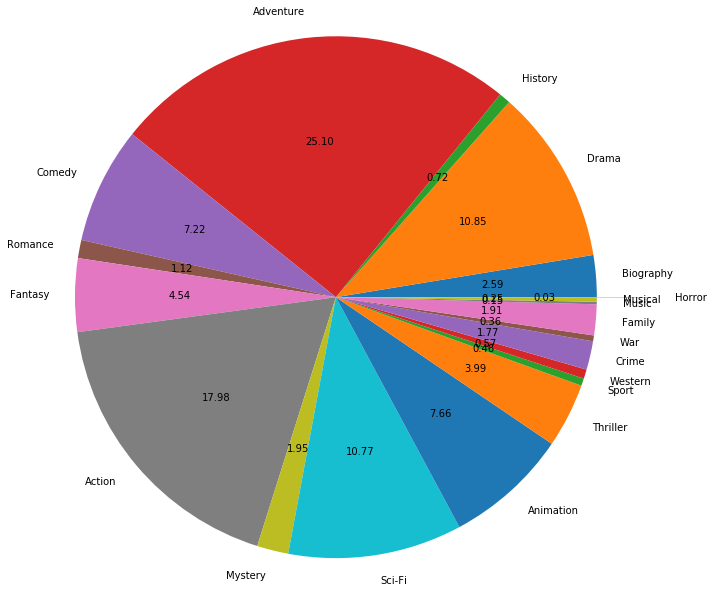

Adventure 25.10
Comedy 7.22
Romance 1.12
Fantasy 4.54
Action 17.98
Mystery 1.95
Sci-Fi 10.77
Animation 7.66
Thriller 3.99
Sport 0.46
Western 0.57
Crime 1.77
War 0.36
Family 1.91
Music 0.15
Musical 0.25
Horror 0.03
Biography 2.59
Drama 10.85
History 0.72


In [96]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
imdbg=pd.merge(imdb,genre,on='Movie_id')
imdbg['Budget'].replace('',0,inplace=True)

dict={}
genre=[]
budget=[]
for i in range(len(imdbg['Budget'])):
    genre.append(imdbg['genre'][i])
    budget.append(imdbg['Budget'][i])

genre=np.array(genre)
budget=np.array(budget)
for i in range(len(genre)):
    a=genre[i]
    if a!='':
        if a in dict:
            dict[a]+=budget[i]
        else:
            dict[a]=budget[i]
genres=[]
bud=[]
for i in dict:
        genres.append(i)
        bud.append(dict[i])
explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]
plt.pie(bud,labels=genres,radius=3,explode=explode,autopct="%.2f")

plt.show()
count=0
per=[]
for i in bud:
    count+=i
for i in range(len(genres)):
    per.append(np.true_divide(bud[i],count)*100)



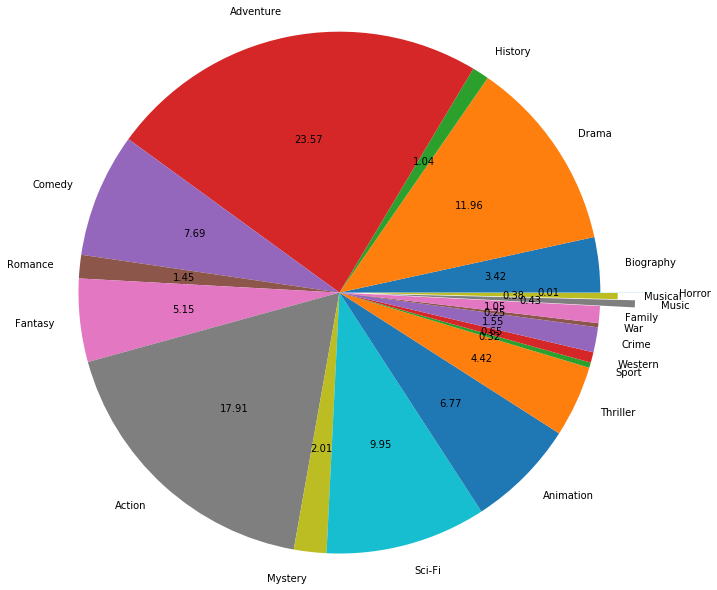

Adventure 23.57
Comedy 7.69
Romance 1.45
Fantasy 5.15
Action 17.91
Mystery 2.01
Sci-Fi 9.995
Animation 6.77
Thriller 4.42
Sport 0.32
Western 0.65
Crime 1.55
War 0.25
Family 1.05
Music 0.43
Musical 0.38
Horror 0.01
Biography 3.42
Drama 11.96
History 1.04


In [105]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
imdbg=pd.merge(genre,earning,on='Movie_id')
imdbg['total']=imdbg['Domestic']+imdbg['Worldwide']


dict={}
genre=[]
total=[]
for i in range(len(imdbg['total'])):
    genre.append(imdbg['genre'][i])
    total.append(imdbg['total'][i])

genre=np.array(genre)
total=np.array(total)
for i in range(len(genre)):
    a=genre[i]
    if a!='':
        if a in dict:
            dict[a]+=total[i]
        else:
            dict[a]=total[i]
genres=[]
tot=[]
for i in dict:
        genres.append(i)
        tot.append(dict[i])
explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.2,0.6]
plt.pie(tot,labels=genres,radius=3,explode=explode,autopct="%.2f")

plt.show()
count=0
per=[]
for i in tot:
    count+=i
for i in range(len(genres)):
    per.append(np.true_divide(tot[i],count)*100)



In [1]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query('select * from imdb',db)
earning=pd.read_sql_query('select * from earning',db)
genre=pd.read_sql_query('select * from genre',db)
movie_id=genre['Movie_id'].value_counts().index
genre_array=[]

for i in range(len(movie_id)):
    single_genre=[]
    single=genre[genre['Movie_id']==movie_id[i]]['genre'].values
    single_genre.append(movie_id[i])
    for i in single:
        single_genre.append(i)
    genre_array.append(single_genre)
new_genre=pd.DataFrame(genre_array,columns=['Movie_id','genre_1','genre_2','genre_3'])
result=pd.merge(imdb,new_genre,on="Movie_id")
imdb_earning_genre=pd.merge(result,earning,on="Movie_id")
imdb_earning_genre['Domestic'].replace('',0,inplace=True)
imdb_earning_genre['Worldwide'].replace('',0,inplace=True)
imdb_earning_genre['Total Earning']=imdb_earning_genre['Domestic']+imdb_earning_genre['Worldwide']
imdb_earning_genre['Budget'].replace('',0,inplace=True)
genre_sci=imdb_earning_genre[(imdb_earning_genre['genre_1']=='Sci-Fi')
                            | (imdb_earning_genre['genre_2']=='Sci-Fi')
                            | (imdb_earning_genre['genre_3']=='Sci-Fi')]
genre_sci_mystery=genre_sci[(genre_sci['genre_1']=="Mystery")
                           |(genre_sci['genre_2']=="Mystery")
                           |(genre_sci['genre_3']=="Mystery")]
movie_name=genre_sci_mystery[genre_sci_mystery['Rating']>=8].values[0]
print(movie_name[1])

Arrival (2016)
